In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Processed_NYSE.csv')

#Explore Dataset

In [ ]:
# View the first few rows of the dataset
df.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,7184.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,7326.740234,0.921723,0.019733,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,7354.870117,-0.375903,0.003839,0.019733,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,7377.700195,0.996234,0.003104,0.003839,0.019733,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,7393.930176,0.059932,0.002200,0.003104,0.003839,0.019733,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [ ]:
# View the data types and non-null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1983 non-null   float64
 3   mom             1983 non-null   float64
 4   mom1            1982 non-null   float64
 5   mom2            1981 non-null   float64
 6   mom3            1980 non-null   float64
 7   ROC_5           1979 non-null   float64
 8   ROC_10          1974 non-null   float64
 9   ROC_15          1969 non-null   float64
 10  ROC_20          1964 non-null   float64
 11  EMA_10          1975 non-null   float64
 12  EMA_20          1965 non-null   float64
 13  EMA_50          1935 non-null   float64
 14  EMA_200         1785 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6            1984 non-null   f

In [ ]:


# Check for missing values
print(df.isnull().sum())
#fill nan rows with zeroes
df = df.fillna(0)

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
print(df.duplicated().sum())

# remove any duplicate rows
df.drop_duplicates(keep=False, inplace=True)




Date              0
Close             0
Volume            0
mom               0
mom1              0
                 ..
Dollar index-F    0
Dollar index      0
wheat-F           0
XAG               0
XAU               0
Length: 84, dtype: int64
0


#Data visualization

In [ ]:
#import libraries first
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

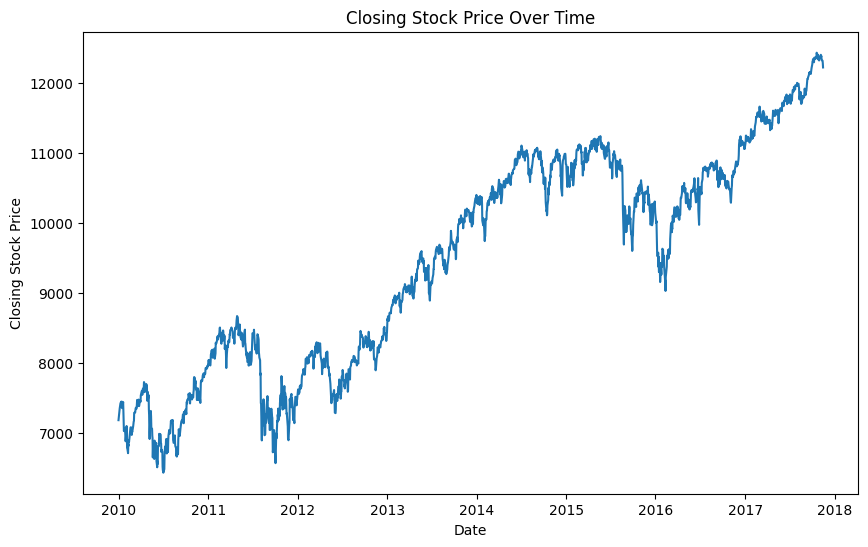

In [ ]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

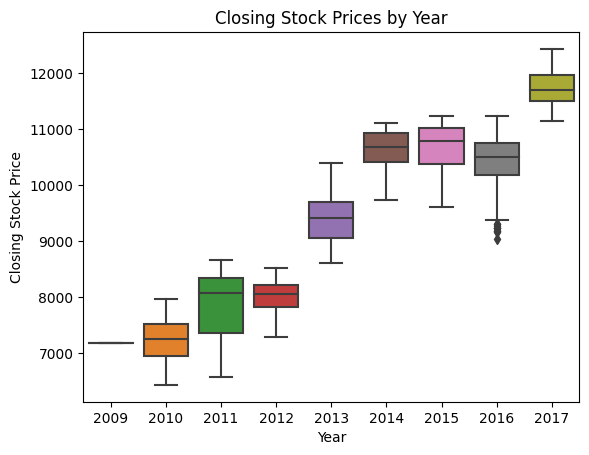

In [ ]:

df['year'] = df['Date'].dt.year
sns.boxplot(x='year', y='Close', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

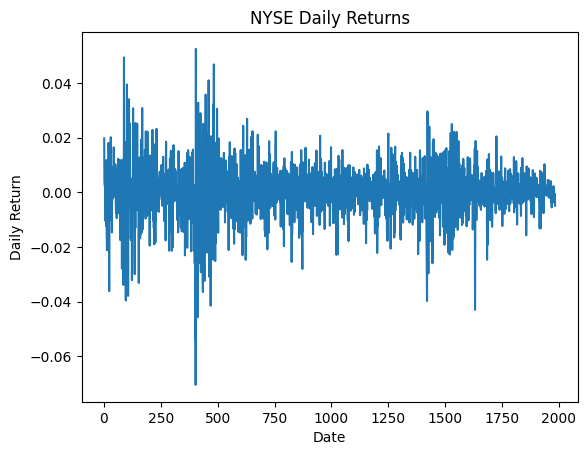

In [ ]:
daily_returns = df['Close'].pct_change()
# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('NYSE Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.

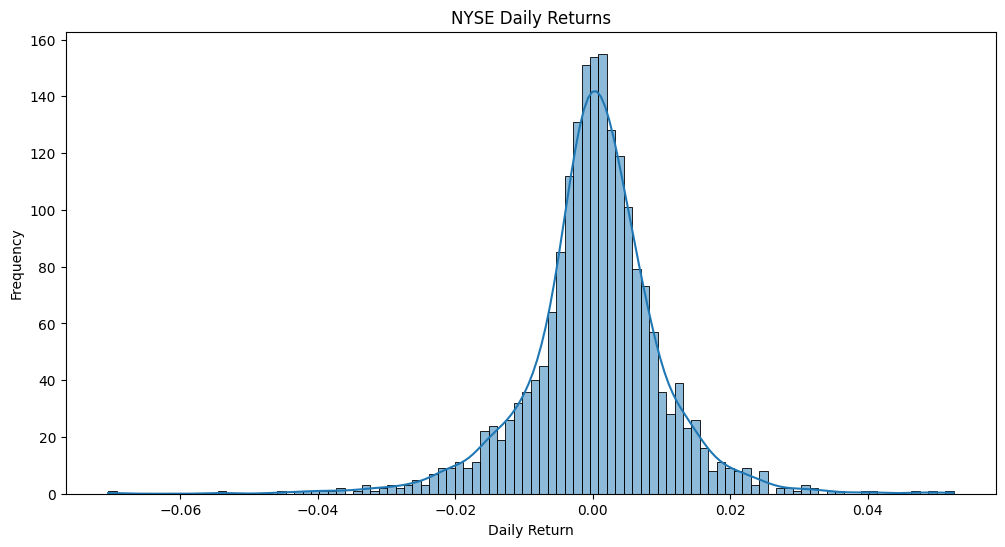

In [ ]:
# Create a histogram of the daily returns
plt.figure(figsize=(12,6))
sns.histplot(df['Close'].pct_change().dropna(), bins=100, kde=True)
plt.title('NYSE Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

#Baseline Model: ARIMA model

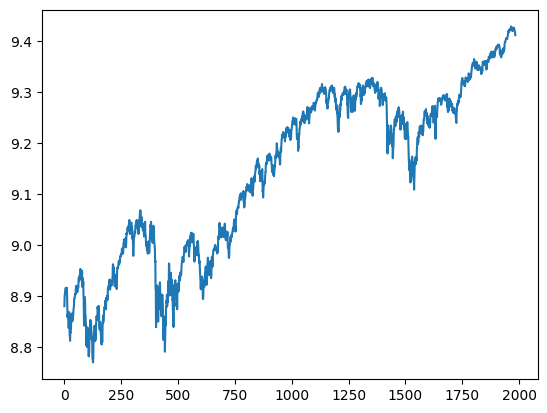

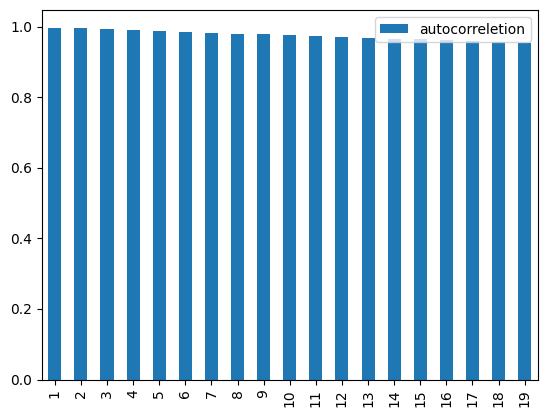

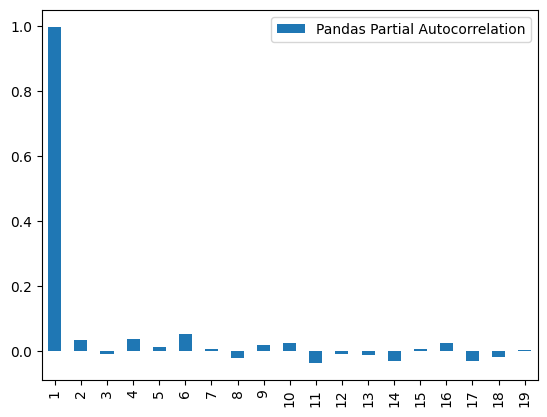

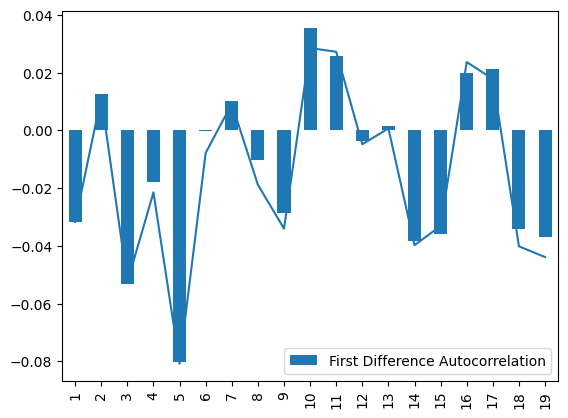

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1984
Model:                 ARIMA(0, 1, 0)   Log Likelihood                6359.959
Date:                Sun, 16 Apr 2023   AIC                         -12717.919
Time:                        23:04:02   BIC                         -12712.327
Sample:                             0   HQIC                        -12715.865
                               - 1984                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.584e-05   1.66e-06     57.820      0.000    9.26e-05    9.91e-05
Ljung-Box (L1) (Q):                   1.99   Jarque-Bera (JB):              1982.01
Prob(Q):                              0.16   Pr

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([6763.930176, 6736.600098, 6520.089844, 6469.649902, 6462.029785,
       6434.810059])

In [ ]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# Load data from a CSV file
variables = pandas.read_csv("/content/Processed_NYSE .csv")

# Extract the "Close" column from the loaded data
Close =variables ["Close"]

# Take the natural logarithm of the "Close" values
lnClose=np.log(Close)

# Plot the lnClose values
plt.plot(lnClose)
plt.show()

# Calculate autocorrelation for lnClose values
acf_1 =  acf(lnClose)[1:20]

# Create a dataframe to store autocorrelation values
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['autocorreletion']
test_df.index += 1

# Plot the autocorrelation values
test_df.plot(kind='bar')
plt.show()

# Calculate partial autocorrelation for lnClose values
pacf_1 = pacf(lnClose)[1:20]

# Create a dataframe to store partial autocorrelation values
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1

# Plot the partial autocorrelation values
test_df.plot(kind='bar')
plt.show

# Calculate the first difference of lnClose values
lnClose_diff=lnClose-lnClose.shift()
diff=lnClose_diff.dropna()

# Calculate autocorrelation for the first difference of lnClose values
acf_1_diff =  acf(diff)[1:20]

# Create a dataframe to store autocorrelation values for the first difference
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1

# Plot the autocorrelation values for the first difference
test_df.plot(kind='bar')

# Calculate partial autocorrelation for the first difference of lnClose values
pacf_1_diff =  pacf(diff)[1:20]

# Plot the partial autocorrelation values for the first difference
plt.plot(pacf_1_diff)
plt.show()

# Convert lnClose values to a numpy array
price_matrix=lnClose.to_numpy()

# Fit an ARIMA model with order (0,1,0)
model = sm.tsa.arima.ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit()

# Print the summary of the ARIMA model
print(model_fit.summary())

# Make predictions using the ARIMA model for time steps 122 to 127
predictions=model_fit.predict(122, 127, typ='levels')
predictions

# Take the exponential of the predicted values to obtain the original scale
predictionsadjusted=np.exp(predictions)
predictionsadjusted

#Supervised Model 1: LSTM (Long-Term Short Memory)

Long Short-Term Memory (LSTM) is a form of recurrent neural network that is used to learn order dependence in sequence prediction tasks. Because of its ability to store past data, LSTM is particularly beneficial in predicting stock prices. This is because predicting a future stock price is based on recent prices.

In [ ]:
#importing necessary libraries for LSTM
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

!pip install keras
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates

from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

#from keras.optimisers import adam
from keras.models import load_model
from keras.layers import LSTM
from keras. utils.vis_utils import plot_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#reading the data
df=pd.read_csv("ProcessedUpdt_NYSE.csv")
df.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,12/31/2009,7184.959961,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,1/4/2010,7326.740234,0.921723,0.019733,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,1/5/2010,7354.870117,-0.375903,0.003839,0.019733,0.000000,0.000000,0.0,0.0,0.0,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,1/6/2010,7377.700195,0.996234,0.003104,0.003839,0.019733,0.000000,0.0,0.0,0.0,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,1/7/2010,7393.930176,0.059932,0.002200,0.003104,0.003839,0.019733,0.0,0.0,0.0,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [ ]:
#Print the shape of Dataframe  and selecting features
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isna().values.any())
df=df.fillna(df.mean()) #removing nulls

Dataframe Shape:  (1984, 84)
Null Value Present:  True


<ipython-input-18-b345367e91c6>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean()) #removing nulls


In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df["Close"])
#Selecting the Features
features1 = ["Close","AAPL"] #predicting Apple Stocks through LSTM
features2 = ["Close","GE"] #predicting General Electronics Stocks through LSTM
features3 = ["Close","AMZN"] #predicting Amazon Stocks through LSTM

In [ ]:
#Scaling for features1
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features1])
feature_transform= pd.DataFrame(columns=features1, data=feature_transform, index=df.index)
feature_transform.head()

,Close,AAPL
0,0.125114,0.581999
1,0.148761,0.655315
2,0.153453,0.590142
3,0.157261,0.507075
4,0.159968,0.573291


The sci-kit-learn library’s TimeSeriesSplit class will be used for this. We set the number of splits to 20, indicating that 20% of the data will be used as the test set and 80% of the data will be used to train the LSTM model. 

In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=20)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

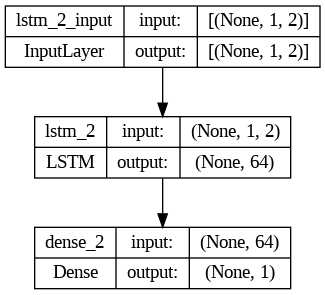

In [ ]:
#Building the LSTM Model for Apple stocks
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
237/237 [==============================] - 1s 4ms/step - loss: 105410.7266
Epoch 2/100
237/237 [==============================] - 1s 4ms/step - loss: 103951.2266
Epoch 3/100
237/237 [==============================] - 1s 4ms/step - loss: 102493.8672
Epoch 4/100
237/237 [==============================] - 1s 4ms/step - loss: 101039.1641
Epoch 5/100
237/237 [==============================] - 1s 3ms/step - loss: 99587.6094
Epoch 6/100
237/237 [==============================] - 1s 3ms/step - loss: 98139.3125
Epoch 7/100
237/237 [==============================] - 1s 3ms/step - loss: 96694.0859
Epoch 8/100
237/237 [==============================] - 1s 3ms/step - loss: 95251.3359
Epoch 9/100
237/237 [==============================] - 1s 3ms/step - loss: 93810.2266
Epoch 10/100
237/237 [==============================] - 1s 3ms/step - loss: 92369.7031
Epoch 11/100
237/237 [==============================] - 1s 3ms/step - loss: 90928.3672
Epoch 12/100
237/237 [==========================

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

3/3 [==============================] - 0s 4ms/step


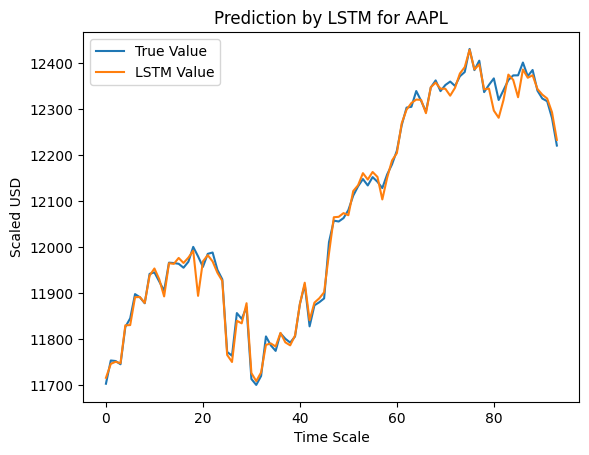

In [ ]:
#Predicted vs True  Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title("Prediction by LSTM for AAPL")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:",mse)
print("r2_score:",r2)

MSE: 272.24710654605303
r2_score: 0.9948209697856129


In [ ]:
#Scaling for features2
scaler1 = MinMaxScaler()
feature_transform1 = scaler.fit_transform(df[features2])
feature_transform1= pd.DataFrame(columns=features2, data=feature_transform1, index=df.index)
feature_transform1.head()

,Close,GE
0,0.125114,0.399040
1,0.148761,0.516679
2,0.153453,0.427840
3,0.157261,0.370387
4,0.159968,0.687046


In [ ]:
#Splitting to Training set and Test set
timesplit1= TimeSeriesSplit(n_splits=20)
for train_index, test_index in timesplit1.split(feature_transform1):
        X_train1, X_test1 = feature_transform1[:len(train_index)], feature_transform1[len(train_index): (len(train_index)+len(test_index))]
        y_train1, y_test1= output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM for GE stocks
trainX1 =np.array(X_train1)
testX1=np.array(X_test1)
X_train1 = trainX1.reshape(X_train1.shape[0], 1, X_train1.shape[1])
X_test1 = testX1.reshape(X_test1.shape[0], 1, X_test1.shape[1])

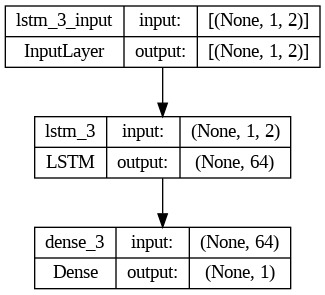

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(1, trainX1.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history1=lstm.fit(X_train1, y_train1, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
237/237 [==============================] - 1s 3ms/step - loss: 132187.4531
Epoch 2/100
237/237 [==============================] - 1s 3ms/step - loss: 129166.6406
Epoch 3/100
237/237 [==============================] - 1s 3ms/step - loss: 126238.5547
Epoch 4/100
237/237 [==============================] - 1s 3ms/step - loss: 123402.5234
Epoch 5/100
237/237 [==============================] - 1s 3ms/step - loss: 120657.9844
Epoch 6/100
237/237 [==============================] - 1s 4ms/step - loss: 118004.4453
Epoch 7/100
237/237 [==============================] - 1s 4ms/step - loss: 115440.2344
Epoch 8/100
237/237 [==============================] - 1s 4ms/step - loss: 112965.2031
Epoch 9/100
237/237 [==============================] - 1s 3ms/step - loss: 110578.0000
Epoch 10/100
237/237 [==============================] - 1s 3ms/step - loss: 108277.4375
Epoch 11/100
237/237 [==============================] - 1s 3ms/step - loss: 106062.0156
Epoch 12/100
237/237 [===================

In [ ]:
#LSTM Prediction
y_pred1= lstm.predict(X_test1)

3/3 [==============================] - 0s 4ms/step


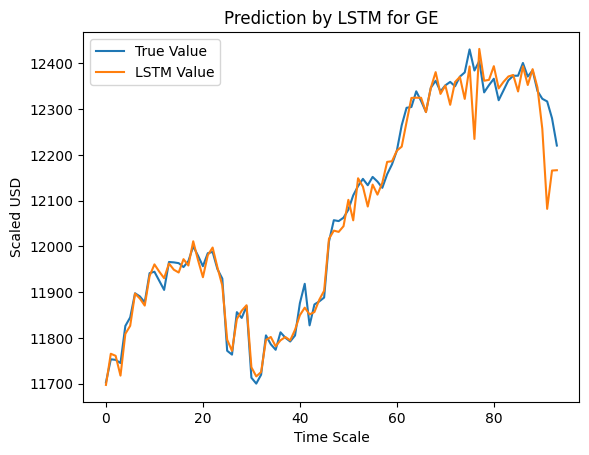

In [ ]:
#Predicted vs True  Close Value – LSTM
plt.plot(y_test1, label="True Value")
plt.plot(y_pred1, label="LSTM Value")
plt.title("Prediction by LSTM for GE")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mse1 = mean_squared_error(y_test1, y_pred1)
r2_1 = r2_score(y_test1, y_pred1)
print("MSE:",mse)
print("r2_score:",r2)

MSE: 272.24710654605303
r2_score: 0.9948209697856129


In [ ]:
#Scaling for features3
scaler2 = MinMaxScaler()
feature_transform2 = scaler.fit_transform(df[features3])
feature_transform2= pd.DataFrame(columns=features3, data=feature_transform2, index=df.index)
feature_transform2.head()

,Close,AMZN
0,0.125114,0.445623
1,0.148761,0.429396
2,0.153453,0.466396
3,0.157261,0.381841
4,0.159968,0.385723


In [ ]:
#Splitting to Training set and Test set
timesplit2= TimeSeriesSplit(n_splits=20)
for train_index, test_index in timesplit2.split(feature_transform2):
        X_train2, X_test2 = feature_transform2[:len(train_index)], feature_transform2[len(train_index): (len(train_index)+len(test_index))]
        y_train2, y_test2= output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM for AMZN stocks
trainX2 =np.array(X_train2)
testX2=np.array(X_test2)
X_train2 = trainX2.reshape(X_train2.shape[0], 1, X_train2.shape[1])
X_test2 = testX2.reshape(X_test2.shape[0], 1, X_test2.shape[1])

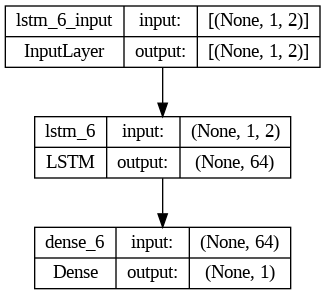

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(1, trainX2.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history2=lstm.fit(X_train2, y_train2, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
237/237 [==============================] - 1s 3ms/step - loss: 101646.1641
Epoch 2/100
237/237 [==============================] - 1s 3ms/step - loss: 99915.4609
Epoch 3/100
237/237 [==============================] - 1s 3ms/step - loss: 98334.3672
Epoch 4/100
237/237 [==============================] - 1s 3ms/step - loss: 96845.5703
Epoch 5/100
237/237 [==============================] - 1s 3ms/step - loss: 95412.7344
Epoch 6/100
237/237 [==============================] - 1s 3ms/step - loss: 94014.4688
Epoch 7/100
237/237 [==============================] - 1s 4ms/step - loss: 92638.6172
Epoch 8/100
237/237 [==============================] - 1s 4ms/step - loss: 91278.5781
Epoch 9/100
237/237 [==============================] - 1s 4ms/step - loss: 89930.8125
Epoch 10/100
237/237 [==============================] - 1s 3ms/step - loss: 88593.4297
Epoch 11/100
237/237 [==============================] - 1s 3ms/step - loss: 87265.2734
Epoch 12/100
237/237 [=============================

In [ ]:
#LSTM Prediction
y_pred2= lstm.predict(X_test2)

3/3 [==============================] - 0s 4ms/step


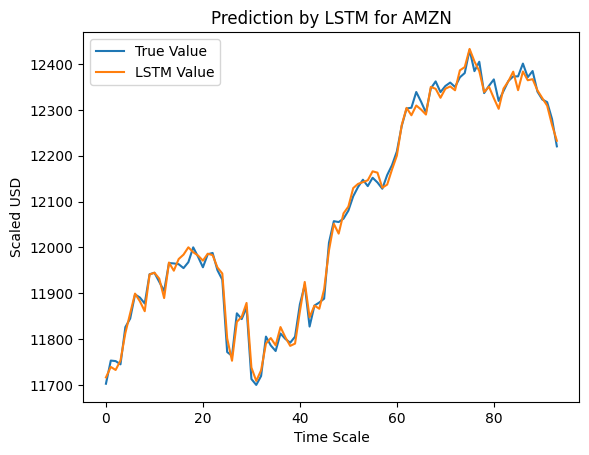

In [ ]:
#Predicted vs True  Close Value – LSTM
plt.plot(y_test2, label="True Value")
plt.plot(y_pred2, label="LSTM Value")
plt.title("Prediction by LSTM for AMZN")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mse_2 = mean_squared_error(y_test2, y_pred2)
r2_2= r2_score(y_test2, y_pred2)
print("MSE:",mse_2)
print("r2_score:",r2_2)

MSE: 210.2681588003946
r2_score: 0.9960000120428586


#Unsupervised Learning Model: K-Means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


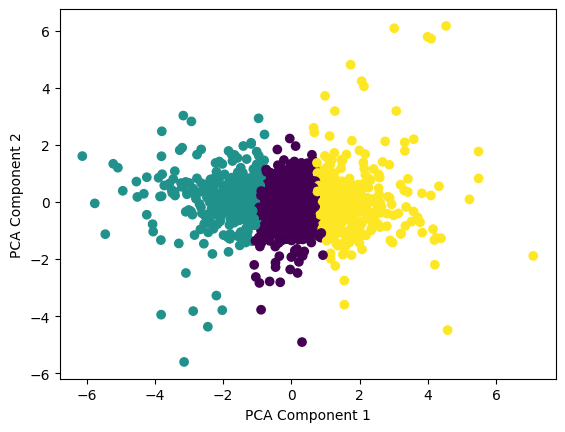

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




# load data
df = pd.read_csv("ProcessedUpdt_NYSE.csv")

# define features
X = df[['AAPL', 'AMZN', 'GE']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# perform clustering with KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

# visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the stock data
stock_data = pd.read_csv("ProcessedUpdt_NYSE.csv")

# Select the relevant features for clustering
X = stock_data[['AAPL', 'AMZN', 'GE']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with different values of k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    print("Silhouette score for k=%d: %0.3f" % (k, score))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k=2: 0.271
Silhouette score for k=3: 0.269


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k=4: 0.199
Silhouette score for k=5: 0.202


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k=6: 0.206
Silhouette score for k=7: 0.206


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k=8: 0.211
Silhouette score for k=9: 0.204


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Supervised Model 2: SVR

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1984 non-null   float64
 3   mom             1984 non-null   float64
 4   mom1            1984 non-null   float64
 5   mom2            1984 non-null   float64
 6   mom3            1984 non-null   float64
 7   ROC_5           1984 non-null   float64
 8   ROC_10          1984 non-null   float64
 9   ROC_15          1984 non-null   float64
 10  ROC_20          1984 non-null   float64
 11  EMA_10          1984 non-null   float64
 12  EMA_20          1984 non-null   float64
 13  EMA_50          1984 non-null   float64
 14  EMA_200         1984 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6            1984 non-null   f

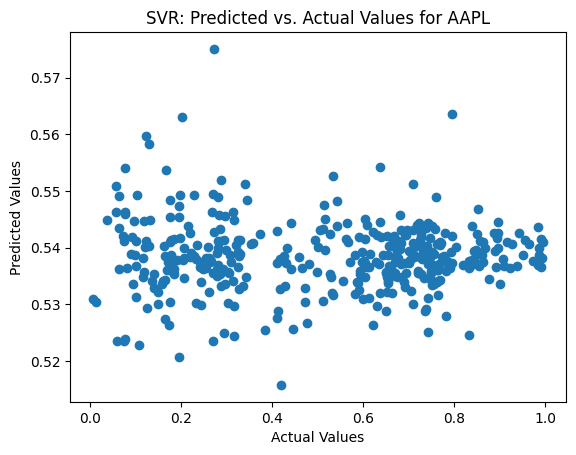

Best Random State:  60
Best R-squared (R2) Score:  0.002419221287177975
Mean Squared Error (MSE):  0.07283262460613514


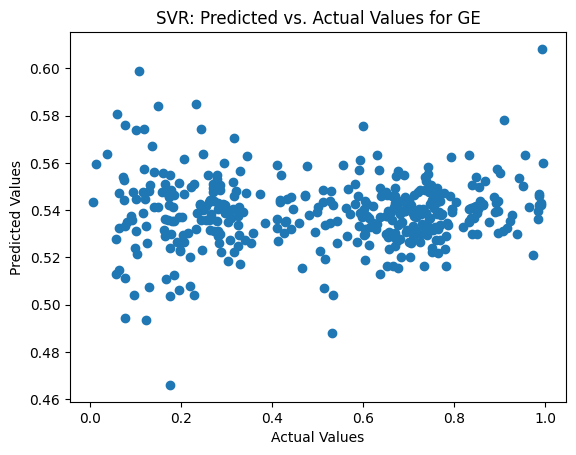

Best Random State:  24
Best R-squared (R2) Score:  0.002889968221491568
Mean Squared Error (MSE):  0.07276616472471348


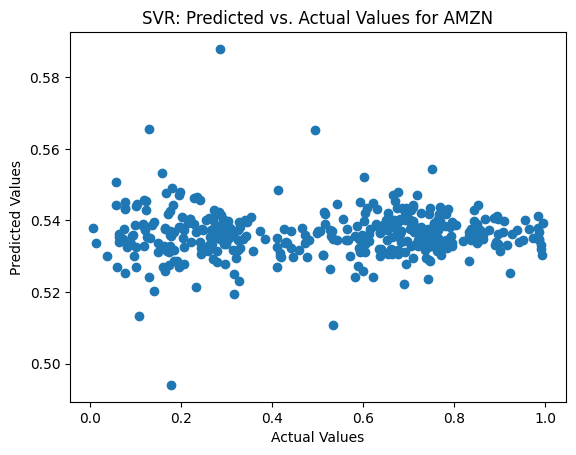

In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

# Load and preprocess the stock market data
data = pd.read_csv('/content/ProcessedUpdt_NYSE.csv')
data.info()


output_var = pd.DataFrame(data["Close"])
#Selecting the Features
features1 = ["Close","AAPL"] 
features2 = ["Close","GE"] 
features3 = ["Close","AMZN"] 



#Scaling for features1
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features1])
feature_transform= pd.DataFrame(columns=features1, data=feature_transform, index=data.index)
feature_transform.head()

X = feature_transform.drop(['Close'], axis=1)  # Input features
y = feature_transform['Close']  # Target variable

# Initialize variables to keep track of best random state and corresponding R-squared score
best_random_state = None
best_r2 = -1

# Iterate over a range of random state values
for random_state in range(1, 101):
    # Split the data into training and test sets with current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    

    # Create an SVR model
    svr_model = SVR(kernel='linear', C=1.0)  # Use a linear kernel, you can try other kernels like 'rbf' or 'poly'
    svr_model.fit(X_train, y_train)  # Train the SVR model

    # Make predictions on test data
    y_pred = svr_model.predict(X_test)

    # Calculate R-squared score for current random state
    r2 = r2_score(y_test, y_pred)
    
    # Update best random state and R-squared score if current score is higher than previous best
    if r2 > best_r2:
        best_random_state = random_state
        best_r2 = r2

# Print the best random state and corresponding R-squared score
print("Best Random State: ", best_random_state)
print("Best R-squared (R2) Score: ", best_r2)


# Make predictions on test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Predicted vs. Actual Values for AAPL')
plt.show()



#Scaling for features2
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features2])
feature_transform= pd.DataFrame(columns=features2, data=feature_transform, index=data.index)
feature_transform.head()


X = feature_transform.drop(['Close'], axis=1)  # Input features
y = feature_transform['Close']  # Target variable


# Initialize variables to keep track of best random state and corresponding R-squared score
best_random_state = None
best_r2 = -1

# Iterate over a range of random state values
for random_state in range(1, 101):
    # Split the data into training and test sets with current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    

    # Create an SVR model
    svr_model = SVR(kernel='linear', C=1.0)  # Use a linear kernel, you can try other kernels like 'rbf' or 'poly'
    svr_model.fit(X_train, y_train)  # Train the SVR model

    # Make predictions on test data
    y_pred = svr_model.predict(X_test)

    # Calculate R-squared score for current random state
    r2 = r2_score(y_test, y_pred)
    
    # Update best random state and R-squared score if current score is higher than previous best
    if r2 > best_r2:
        best_random_state = random_state
        best_r2 = r2

# Print the best random state and corresponding R-squared score
print("Best Random State: ", best_random_state)
print("Best R-squared (R2) Score: ", best_r2)


# Make predictions on test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Predicted vs. Actual Values for GE')
plt.show()

#Scaling the features 3
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features3])
feature_transform= pd.DataFrame(columns=features3, data=feature_transform, index=data.index)
feature_transform.head()


X = feature_transform.drop(['Close'], axis=1)  # Input features
y = feature_transform['Close']  # Target variable


# Initialize variables to keep track of best random state and corresponding R-squared score
best_random_state = None
best_r2 = -1

# Iterate over a range of random state values
for random_state in range(1, 101):
    # Split the data into training and test sets with current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    

    # Create an SVR model
    svr_model = SVR(kernel='linear', C=1.0)  # Use a linear kernel, you can try other kernels like 'rbf' or 'poly'
    svr_model.fit(X_train, y_train)  # Train the SVR model

    # Make predictions on test data
    y_pred = svr_model.predict(X_test)

    # Calculate R-squared score for current random state
    r2 = r2_score(y_test, y_pred)
    
    # Update best random state and R-squared score if current score is higher than previous best
    if r2 > best_r2:
        best_random_state = random_state
        best_r2 = r2

# Print the best random state and corresponding R-squared score
print("Best Random State: ", best_random_state)
print("Best R-squared (R2) Score: ", best_r2)


# Make predictions on test data
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Predicted vs. Actual Values for AMZN')
plt.show()


#SUPERVISED MODEL: LINEAR REGRESSION

In [ ]:
#importing necessary libraries for LSTM
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression

!pip install keras
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates

from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

#from keras.optimisers import adam
from keras.models import load_model
#from keras.layers import LSTM
from keras. utils.vis_utils import plot_model



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#reading the data
df=pd.read_csv("ProcessedUpdt_NYSE.csv")
df.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,12/31/2009,7184.959961,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,1/4/2010,7326.740234,0.921723,0.019733,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,1/5/2010,7354.870117,-0.375903,0.003839,0.019733,0.000000,0.000000,0.0,0.0,0.0,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,1/6/2010,7377.700195,0.996234,0.003104,0.003839,0.019733,0.000000,0.0,0.0,0.0,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,1/7/2010,7393.930176,0.059932,0.002200,0.003104,0.003839,0.019733,0.0,0.0,0.0,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


In [ ]:
#Print the shape of Dataframe  and selecting features
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isna().values.any())
df=df.fillna(df.mean()) #removing nulls

Dataframe Shape:  (1984, 84)
Null Value Present:  True


<ipython-input-3-b345367e91c6>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean()) #removing nulls


In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df["Close"])
#Selecting the Features
features1 = ["Close","AAPL"] #predicting Apple Stocks through LSTM
features2 = ["Close","GE"] #predicting General Electronics Stocks through LSTM
features3 = ["Close","AMZN"] #predicting Amazon Stocks through LSTM

In [ ]:
# Split dataset into training and testing sets for feature 1
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train_data, test_data = df.iloc[0:train_size,:], df.iloc[train_size:len(df),:]

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data[features1])
test_data = scaler.transform(test_data[features1])

# Split the features and target variable into X and y
train_X, train_y = train_data[:, 1:], train_data[:, 0]
test_X, test_y = test_data[:, 1:], test_data[:, 0]

# Build the linear regression model
model = Sequential()
model.add(Dense(1, input_dim=train_X.shape[1]))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model on the training set
model.fit(train_X, train_y, epochs=100, batch_size=8, verbose=2)

# Make predictions on the test set
predictions = model.predict(test_X)

# Calculate the root mean squared error (RMSE) and R-squared score
rmse = math.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)

print('RMSE:', rmse)
print('R-squared:', r2)


Epoch 1/100
199/199 - 3s - loss: 0.5579 - 3s/epoch - 15ms/step
Epoch 2/100
199/199 - 1s - loss: 0.2731 - 670ms/epoch - 3ms/step
Epoch 3/100
199/199 - 1s - loss: 0.1459 - 629ms/epoch - 3ms/step
Epoch 4/100
199/199 - 1s - loss: 0.1004 - 754ms/epoch - 4ms/step
Epoch 5/100
199/199 - 1s - loss: 0.0876 - 502ms/epoch - 3ms/step
Epoch 6/100
199/199 - 1s - loss: 0.0851 - 721ms/epoch - 4ms/step
Epoch 7/100
199/199 - 0s - loss: 0.0848 - 485ms/epoch - 2ms/step
Epoch 8/100
199/199 - 1s - loss: 0.0847 - 525ms/epoch - 3ms/step
Epoch 9/100
199/199 - 1s - loss: 0.0847 - 548ms/epoch - 3ms/step
Epoch 10/100
199/199 - 0s - loss: 0.0847 - 486ms/epoch - 2ms/step
Epoch 11/100
199/199 - 0s - loss: 0.0848 - 440ms/epoch - 2ms/step
Epoch 12/100
199/199 - 0s - loss: 0.0848 - 355ms/epoch - 2ms/step
Epoch 13/100
199/199 - 1s - loss: 0.0848 - 520ms/epoch - 3ms/step
Epoch 14/100
199/199 - 0s - loss: 0.0848 - 406ms/epoch - 2ms/step
Epoch 15/100
199/199 - 1s - loss: 0.0848 - 545ms/epoch - 3ms/step
Epoch 16/100
199/199 

In [ ]:
# Plot actual vs predicted values
plt.scatter(test_y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for AAPL')

# Plot histogram of residuals
residuals = test_y - predictions.flatten()
plt.figure()
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [ ]:
# Split dataset into training and testing sets for feature 2
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train_data, test_data = df.iloc[0:train_size,:], df.iloc[train_size:len(df),:]

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data[features2])
test_data = scaler.transform(test_data[features2])

# Split the features and target variable into X and y
train_X, train_y = train_data[:, 1:], train_data[:, 0]
test_X, test_y = test_data[:, 1:], test_data[:, 0]

# Build the linear regression model
model = Sequential()
model.add(Dense(1, input_dim=train_X.shape[1]))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model on the training set
model.fit(train_X, train_y, epochs=100, batch_size=8, verbose=2)

# Make predictions on the test set
predictions = model.predict(test_X)

# Calculate the root mean squared error (RMSE) and R-squared score
rmse = math.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)

print('RMSE:', rmse)
print('R-squared:', r2)

Epoch 1/100
199/199 - 1s - loss: 0.6417 - 541ms/epoch - 3ms/step
Epoch 2/100
199/199 - 0s - loss: 0.3498 - 220ms/epoch - 1ms/step
Epoch 3/100
199/199 - 0s - loss: 0.1957 - 234ms/epoch - 1ms/step
Epoch 4/100
199/199 - 1s - loss: 0.1247 - 514ms/epoch - 3ms/step
Epoch 5/100
199/199 - 0s - loss: 0.0970 - 386ms/epoch - 2ms/step
Epoch 6/100
199/199 - 0s - loss: 0.0881 - 464ms/epoch - 2ms/step
Epoch 7/100
199/199 - 1s - loss: 0.0858 - 560ms/epoch - 3ms/step
Epoch 8/100
199/199 - 1s - loss: 0.0854 - 812ms/epoch - 4ms/step
Epoch 9/100
199/199 - 1s - loss: 0.0853 - 620ms/epoch - 3ms/step
Epoch 10/100
199/199 - 1s - loss: 0.0853 - 782ms/epoch - 4ms/step
Epoch 11/100
199/199 - 0s - loss: 0.0853 - 346ms/epoch - 2ms/step
Epoch 12/100
199/199 - 0s - loss: 0.0853 - 343ms/epoch - 2ms/step
Epoch 13/100
199/199 - 0s - loss: 0.0852 - 483ms/epoch - 2ms/step
Epoch 14/100
199/199 - 1s - loss: 0.0853 - 566ms/epoch - 3ms/step
Epoch 15/100
199/199 - 0s - loss: 0.0852 - 455ms/epoch - 2ms/step
Epoch 16/100
199/19

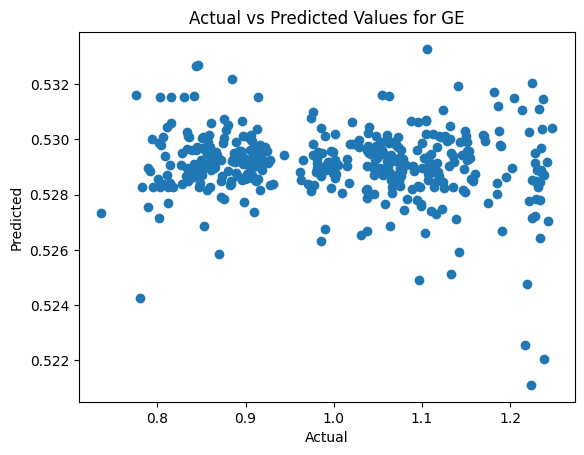

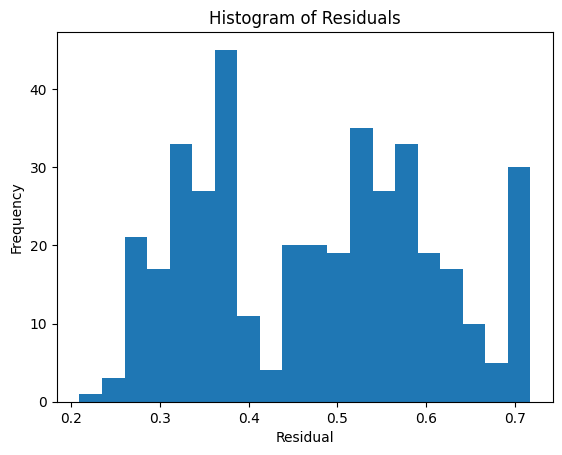

In [ ]:
# Plot actual vs predicted values
plt.scatter(test_y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for GE')

# Plot histogram of residuals
residuals = test_y - predictions.flatten()
plt.figure()
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [ ]:
# Split dataset into training and testing sets for feature 3
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train_data, test_data = df.iloc[0:train_size,:], df.iloc[train_size:len(df),:]

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data[features3])
test_data = scaler.transform(test_data[features3])

# Split the features and target variable into X and y
train_X, train_y = train_data[:, 1:], train_data[:, 0]
test_X, test_y = test_data[:, 1:], test_data[:, 0]

# Build the linear regression model
model = Sequential()
model.add(Dense(1, input_dim=train_X.shape[1]))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model on the training set
model.fit(train_X, train_y, epochs=100, batch_size=8, verbose=2)

# Make predictions on the test set
predictions = model.predict(test_X)

# Calculate the root mean squared error (RMSE) and R-squared score
rmse = math.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)

print('RMSE:', rmse)
print('R-squared:', r2)


Epoch 1/100
199/199 - 1s - loss: 0.2093 - 590ms/epoch - 3ms/step
Epoch 2/100
199/199 - 0s - loss: 0.1102 - 225ms/epoch - 1ms/step
Epoch 3/100
199/199 - 0s - loss: 0.0884 - 238ms/epoch - 1ms/step
Epoch 4/100
199/199 - 0s - loss: 0.0856 - 217ms/epoch - 1ms/step
Epoch 5/100
199/199 - 0s - loss: 0.0853 - 230ms/epoch - 1ms/step
Epoch 6/100
199/199 - 0s - loss: 0.0853 - 225ms/epoch - 1ms/step
Epoch 7/100
199/199 - 0s - loss: 0.0853 - 216ms/epoch - 1ms/step
Epoch 8/100
199/199 - 0s - loss: 0.0853 - 229ms/epoch - 1ms/step
Epoch 9/100
199/199 - 0s - loss: 0.0853 - 228ms/epoch - 1ms/step
Epoch 10/100
199/199 - 0s - loss: 0.0853 - 233ms/epoch - 1ms/step
Epoch 11/100
199/199 - 0s - loss: 0.0853 - 258ms/epoch - 1ms/step
Epoch 12/100
199/199 - 0s - loss: 0.0852 - 229ms/epoch - 1ms/step
Epoch 13/100
199/199 - 0s - loss: 0.0853 - 237ms/epoch - 1ms/step
Epoch 14/100
199/199 - 0s - loss: 0.0852 - 214ms/epoch - 1ms/step
Epoch 15/100
199/199 - 0s - loss: 0.0853 - 248ms/epoch - 1ms/step
Epoch 16/100
199/19

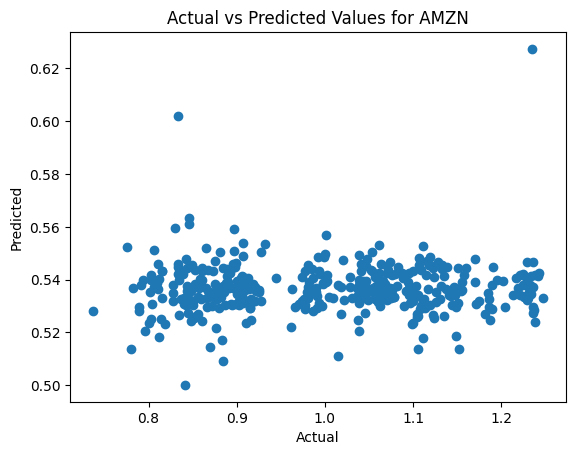

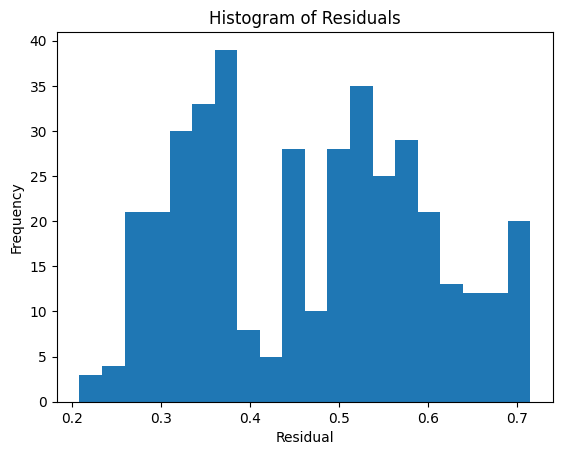

In [ ]:
# Plot actual vs predicted values
plt.scatter(test_y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for AMZN')

# Plot histogram of residuals
residuals = test_y - predictions.flatten()
plt.figure()
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
